# TDA  with Python using the Gudhi Library  

# Confidence regions for persistence diagrams : data points  

**author** Bertrand MICHEL

In [1]:
import persistence_statistics as ps

import numpy as np
import pickle as pickle
import gudhi as gd  
from sklearn.neighbors.kde import KernelDensity
from pylab import *
import seaborn as sns; sns.set()

### Introduction

In this tutorial, we introduce confidence regions for persistence diagrams for filtrations of the sub level sets of functions defined on $\mathbb R^d$. 

In [2]:
f = open("./datasets/crater_tuto","rb")
crater = pickle.load(f)
f.close()

n,p = crater.shape
print(n)

7536


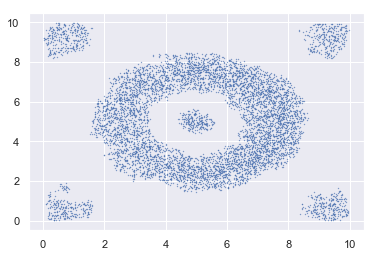

In [3]:
plt.scatter(crater[:,0],crater[:,1],s=0.1);

In [4]:
n = shape(crater)[0]
bot_list =  []

#bandwidth
h = 0.25

kde = KernelDensity(kernel='gaussian', bandwidth=h)

In [5]:
xval = np.arange(0,10,0.1)
yval = np.arange(0,10,0.1)
nx = len(xval)
ny = len(yval)
positions = np.array([[u,v] for u in xval for v in yval ])

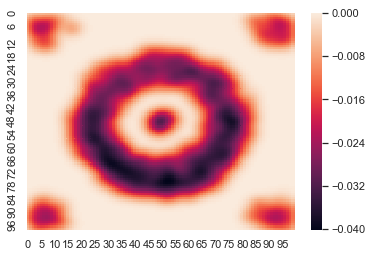

In [6]:
kde.fit(crater)
scores = - exp(kde.score_samples(X= positions))
ax = sns.heatmap(scores.reshape(nx,ny))

We apply a raw threshold close to zero to avoid decrease the "topological noise".

In [7]:
scores = scores * (scores < - 0.001)

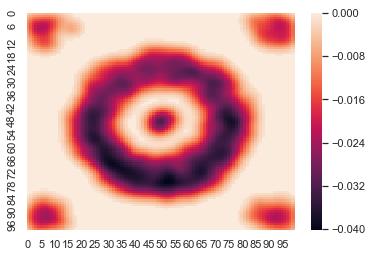

In [8]:
ax = sns.heatmap(scores.reshape(nx,ny));

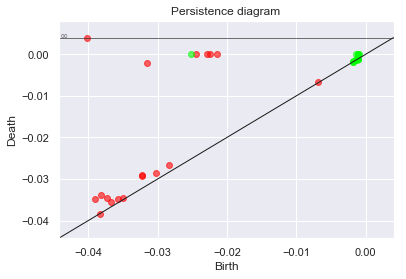

In [9]:
cc_density_crater= gd.CubicalComplex(dimensions= [nx,ny],
                                    top_dimensional_cells = scores)

pers_density_crater = cc_density_crater.persistence()
gd.plot_persistence_diagram(pers_density_crater);

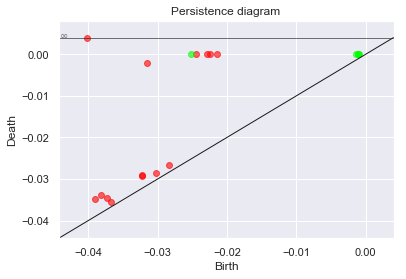

In [10]:
pers_density_crater_thresh = ps.sort_thresh_pers(pers_density_crater,
                                              int_trunc = None,
                                              pers_length = 0.001)
gd.plot_persistence_diagram(pers_density_crater_thresh);

### bootstrap ...


blablbalbalbalbalb


In [8]:
def mydensity(data,x):
    kde.fit(data)
    vrais = np.exp(kde.score_samples(x))
    return(-vrais * (vrais > 0.001))    

In [8]:
calpha = ps.bootstrap_band_function(data = crater,hatf = mydensity ,
                                   grid = positions,level = 0.95,B= 50)

In [9]:
print(calpha)

0.008817146448610827


blablab et donc on a un IDC de E(hatf) +_ calpha.

par la stabilité on peut lutiliser directement ainsi :

In [10]:
gd.plot_persistence_diagram(pers_density_crater,band = 2 * calpha);

NameError: name 'pers_density_crater' is not defined

# bottleneck

In [ ]:
myquantile,pers_dat = ps.bottleneck_bootstrap_function(data = crater,
                                                    hatf = mydensity ,
                                                    grid = positions,
                                                    level = 0.95,B= 10,ncores = None,
                                  max_dimension=1,
                                  output_dvec = False)

#TODO



COMMENTER LA FONCTION ps.bootstrapBand_function


rerediger ce notebool

faire les niveaux de la dtm ici ?

faire une fonction bottlneck pour les filtrations de sous niveaux de fonction

ensuite passer aux versions linéarisées : dans le bouquon faire une fois pour toute les i de conf pour ces derniers ?

In [15]:
positions.shape

(10000, 2)